In [2]:
mnist_train = pd.read_csv("sign_mnist_train.csv")
mnist_test = pd.read_csv("sign_mnist_test.csv")

In [3]:
mnist_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [4]:
y_train = mnist_train["label"].copy().to_numpy()
X_train = mnist_train.drop(columns=["label"]).to_numpy()

print("The training digits data:\n", X_train)
print("Digit labels: ", y_train)

# Similarly for the test set
y_test = mnist_test["label"].copy().to_numpy()
X_test = mnist_test.drop(columns=["label"]).to_numpy()

The training digits data:
 [[107 118 127 ... 204 203 202]
 [155 157 156 ... 103 135 149]
 [187 188 188 ... 195 194 195]
 ...
 [174 174 174 ... 202 200 200]
 [177 181 184 ...  64  87  93]
 [179 180 180 ... 205 209 215]]
Digit labels:  [ 3  6  2 ... 18 17 23]


After getting the digits data array and the corresponding labels we move on to visualize how the data looks.

## Section 2 - Visualizing the Data

Since any instance of the data is an array of length 784 (28 x 28 image).
We plot the digit using `matplotlib` by reshaping the array of length 784.

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

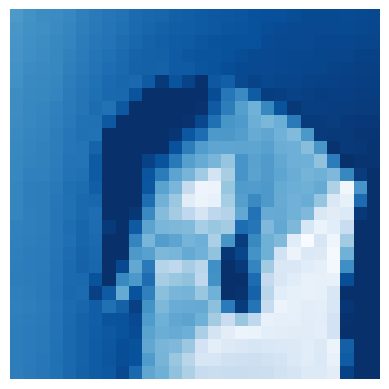

prediction is 17 so the alphabet being shown here is Q


In [23]:
some_digit_data = X_train[5]
some_digit_image = some_digit_data.reshape(28, 28)

# imshow plots the matrix
plt.imshow(some_digit_image, cmap=plt.cm.Blues)
plt.axis("off")
plt.show()

In [7]:
print(y_train[5])

16


Just to get some more feel of the data, lets create a function to plot digits

In [8]:
def plot_digits(data, row_size=5):
    for i in range(len(data)):
        ax = plt.subplot(row_size, row_size, i+1)
        
        digit = data[i]
        digit_image = digit.reshape(28, 28)
        
        plt.imshow(digit_image, cmap=plt.cm.Blues)
        plt.axis("off")

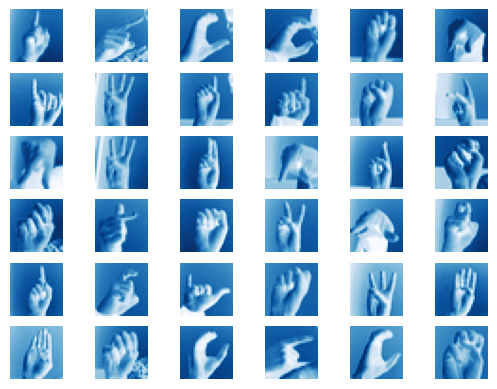

In [9]:
plot_digits(X_train[:36], row_size=6)
plt.show()

## Section 3 - Training the K-Nearest Neighbors Model



In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
# Predicting on some digit
knn.predict([some_digit_data])

array([16], dtype=int64)

Seems right!

Now let's evaluate this simple model

## Section 4 - Evaluating our model

There are various ways to evaluate any classifier. One way is to build a **confusion matrix** which stores the information regarding the actual labels vs the classifier predicted labels.

But to build a confusion matrix, we need the classifications from our classifier. Instead of using the test set for that, we will use a technique called **Cross Validation** on the training set.
Basically, it reserves a small part of the training set for validation of the model, while it trains on rest of the training set.

Okay enough talking, let me show you...

In [12]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# our predictions using cross validation on training set
knn_preds = cross_val_predict(knn, X_train, y_train, cv=3)

In [13]:
knn_preds

array([ 3,  6,  2, ..., 18, 17, 23], dtype=int64)

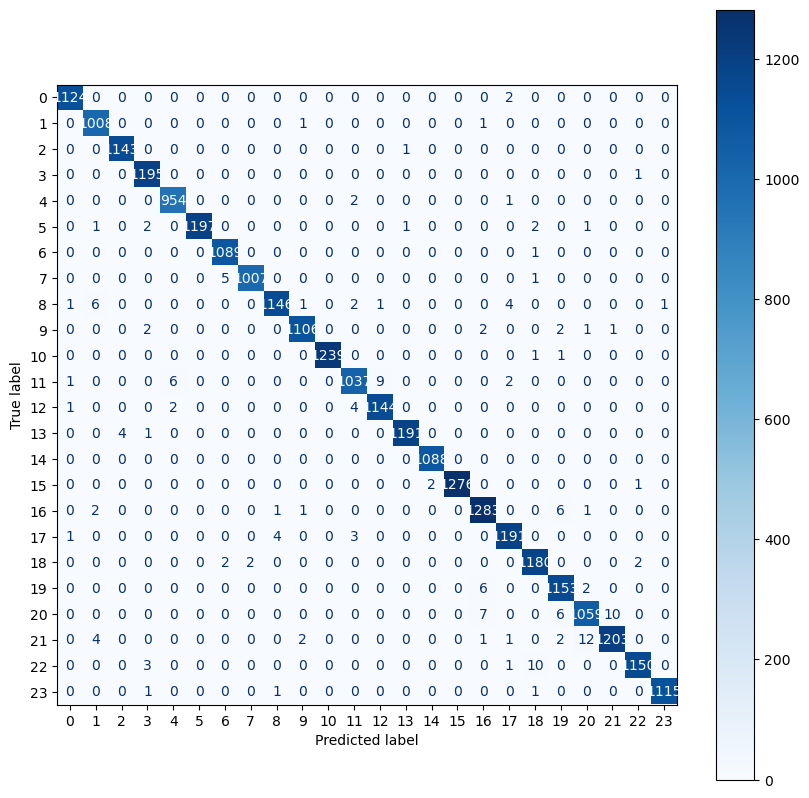

In [17]:
# Build the confusion matrix
cf_mat = confusion_matrix(y_train, knn_preds)

# Display it
cm_fig, cm_ax = plt.subplots(figsize=(10, 10))
cf_mat_disp = ConfusionMatrixDisplay(cf_mat)
cf_mat_disp.plot(ax=cm_ax, cmap=plt.cm.Blues)
plt.show()

Take some time to understand the structure of this matrix.
It shows the number of instances classified correctly/incorrectly.

For example, the cell (5, 5) shows that classifier correctly classified 5211 instances whose class was '5'. Similarly the cell (5, 6) shows that the classifier incorrectly classified 58 instances of class '5' as class '6'.

A perfect classifier will have a confusion matrix, where all the cells except the main diagonal has the value 0.

In [18]:
from sklearn.metrics import classification_report

def class_report(y, y_preds):
    print("\nClassification report:\n\n",
          classification_report(y, y_preds, digits=6))

To examine the classsification report of our KNN model, we use this function...

In [19]:
class_report(y_train, knn_preds)


Classification report:

               precision    recall  f1-score   support

           0   0.996454  0.998224  0.997338      1126
           1   0.987267  0.998020  0.992614      1010
           2   0.996513  0.999126  0.997818      1144
           3   0.992525  0.999164  0.995833      1196
           4   0.991684  0.996865  0.994268       957
           5   1.000000  0.994186  0.997085      1204
           6   0.993613  0.999083  0.996340      1090
           7   0.998018  0.994077  0.996044      1013
           8   0.994792  0.986231  0.990493      1162
          10   0.995500  0.992819  0.994157      1114
          11   1.000000  0.998388  0.999194      1241
          12   0.989504  0.982938  0.986210      1055
          13   0.991334  0.993918  0.992625      1151
          14   0.998324  0.995819  0.997070      1196
          15   0.998165  1.000000  0.999082      1088
          16   1.000000  0.997654  0.998826      1279
          17   0.986923  0.991499  0.989206      1294
 

As we can see, currently our barebones KNN model has ~ 96% accuracy in classifying the digits. Can we achieve more?

## Section 5 - Fine tuning our model

We will be using **Grid Searching Technique** on our KNN model, to find the hyperparameters which may result in increased accuracy.

Since Grid Search may take long time in finding good hyperparameters I'll comment that code out...

The `best_estimator_` method tells us which model (with it's hyperparameters) performed best.

The results from Grid Search to be printed.

This search gives us the best estimator/classifier as:

**KNeighborsClassifier(n_neighbors=3, weights='distance')**

So we use this as our fine tuned model.

In [20]:
knn_tuned = KNeighborsClassifier(n_neighbors=3, weights='distance')

knn_tuned.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

Let's measure the accuracy of our fine tuned model on the test set!

In [21]:
y_test_preds = knn_tuned.predict(X_test)

In [22]:
class_report(y_test, y_test_preds)


Classification report:

               precision    recall  f1-score   support

           0   0.817284  1.000000  0.899457       331
           1   0.961722  0.930556  0.945882       432
           2   0.956790  1.000000  0.977918       310
           3   0.811189  0.946939  0.873823       245
           4   0.800333  0.965863  0.875341       498
           5   0.933610  0.910931  0.922131       247
           6   0.913408  0.939655  0.926346       348
           7   0.964539  0.935780  0.949942       436
           8   0.891509  0.656250  0.756000       288
          10   0.831169  0.580060  0.683274       331
          11   0.926108  0.899522  0.912621       209
          12   0.780769  0.515228  0.620795       394
          13   0.775330  0.604811  0.679537       291
          14   1.000000  0.906504  0.950959       246
          15   0.997126  1.000000  0.998561       347
          16   0.953488  1.000000  0.976190       164
          17   0.321033  0.604167  0.419277       144
 